In [11]:
#Including a regression fit

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

PUNTO 1

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv')

PUNTO 2

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df.isna().sum()

PUNTO 3

In [3]:
element_unique=df['ocean_proximity'].unique()

PUNTO 4

In [4]:
cols = ["housing_median_age",    "total_rooms",    "total_bedrooms",    "population",    "households",    "median_income",    "median_house_value"]
group=df.groupby('ocean_proximity')[cols].mean()

PUNTO 5

<Axes: xlabel='ocean_proximity'>

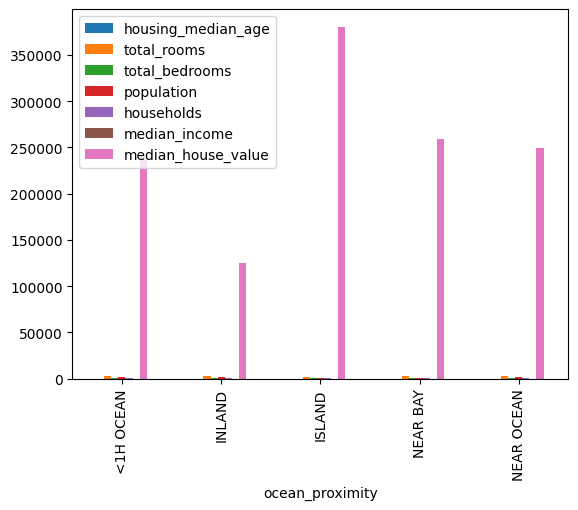

In [7]:
# hISTOGRAMA CON MATP 'median_house_value' VS 'ocean_proximity' EN GROUP
group.plot(kind='bar')

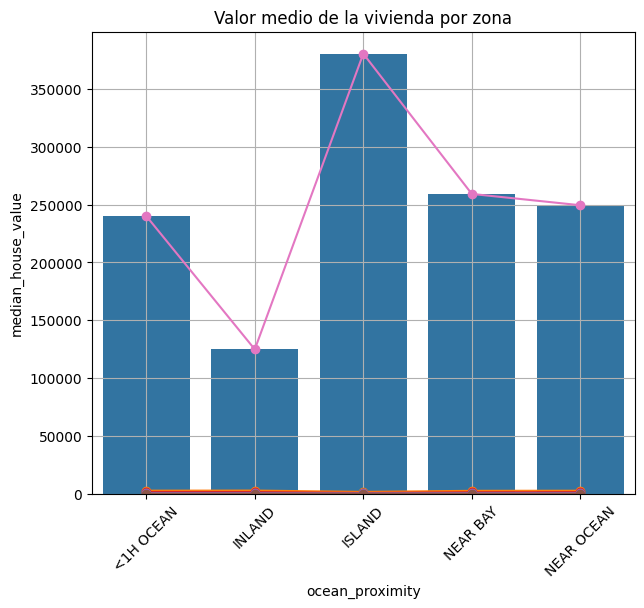

In [12]:
#HISTOGRAMA CON SEABORN 'median_house_value' VS 'ocean_proximity' EN GROUP
media=df['median_house_value'].mean()
desviacion_estandar=df['median_house_value'].std()
plt.figure(figsize=(7, 6))
plt.plot(group.index, group.values, marker='o')
sns.barplot(data=group, x=group.index, y='median_house_value')
plt.title('Valor medio de la vivienda por zona')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

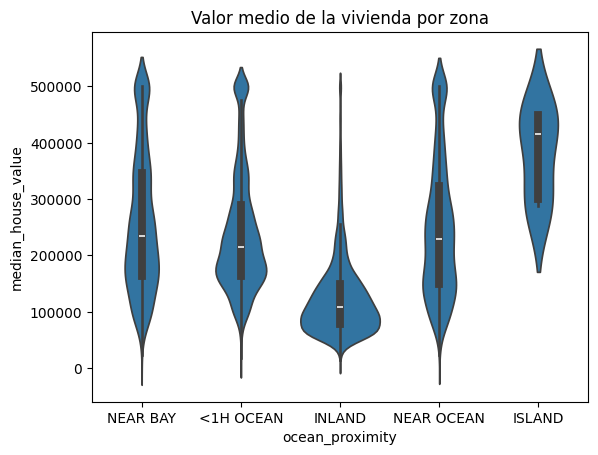

In [13]:
# DIAGRAMA DE VIOLIN DE 'median_house_value' VS 'ocean_proximity' EN EL DATAFRAME
sns.violinplot(data=df, x='ocean_proximity', y='median_house_value')
plt.title('Valor medio de la vivienda por zona')
plt.show()

PUNTO 6

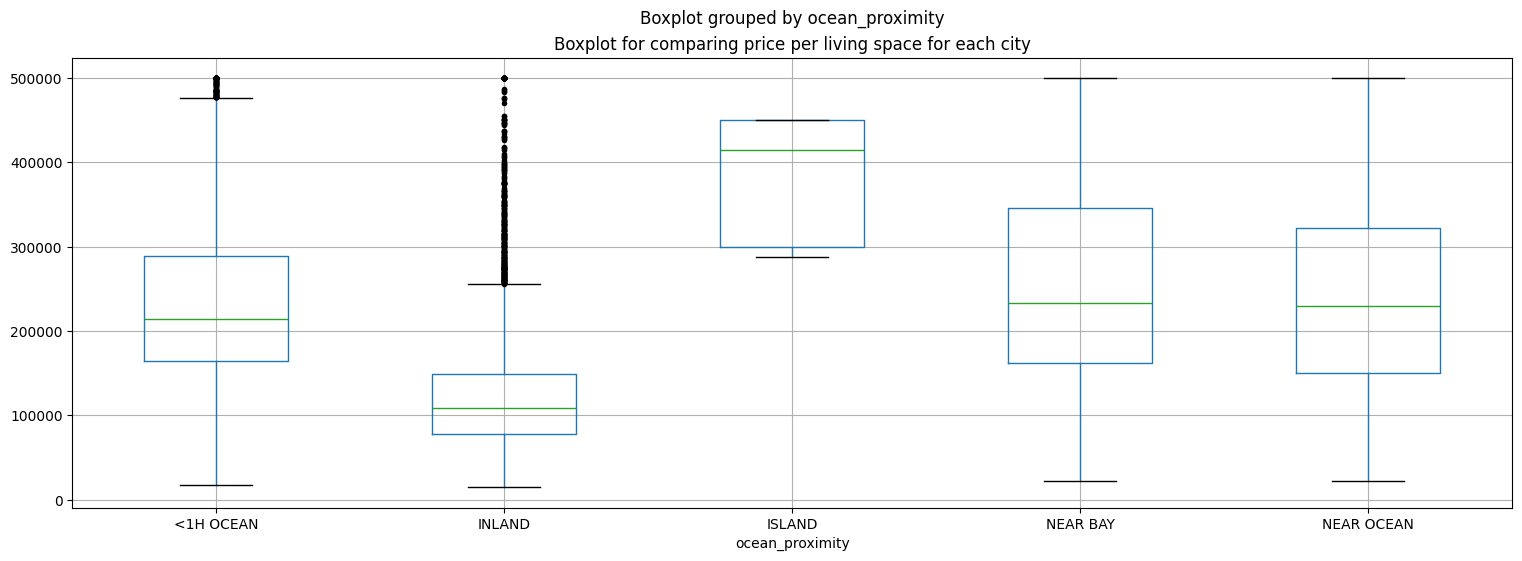

In [14]:
# DIAGRAMA DE CAJA
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
# set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

PUNTO 7

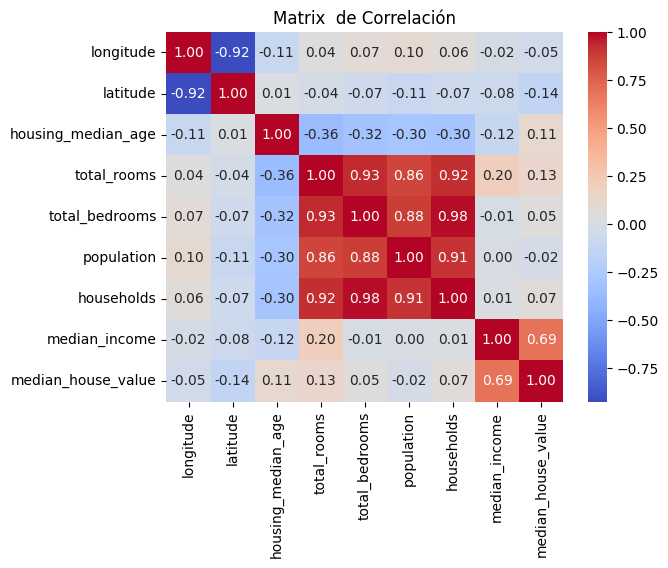

In [15]:
# MATRIX DE CORRELACIÓN
numeric_df=df.select_dtypes(include=[np.number])
correlation_matrix=numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrix  de Correlación')
plt.show()

PUNTO 9

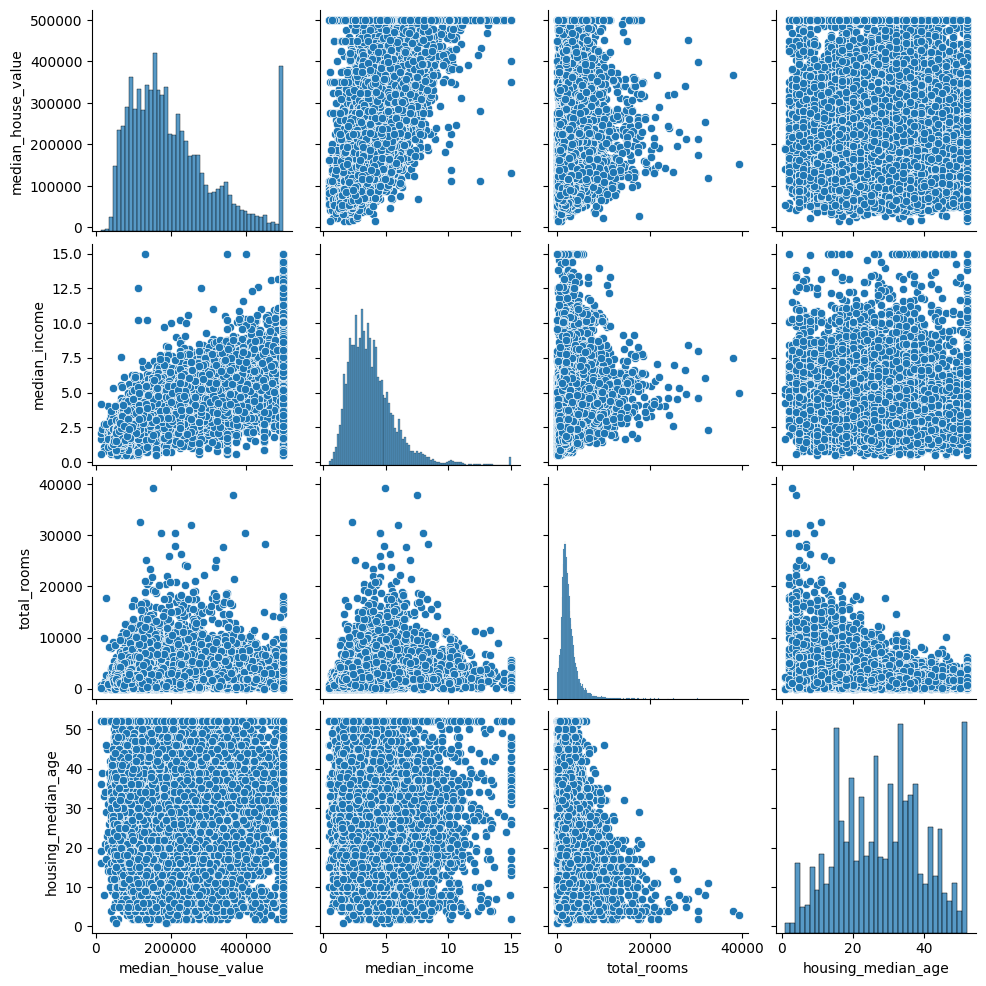

In [16]:
#GRAFICO PAIRPLOT
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
sns.pairplot(df[cols])

PUNTO 10

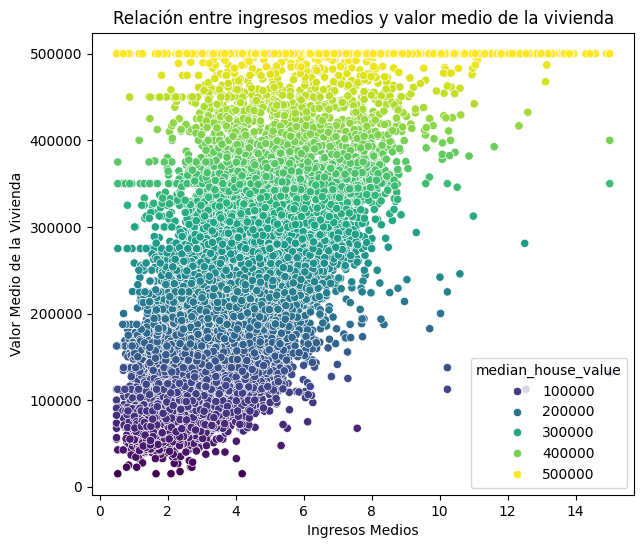

In [17]:
# SCATTER PLOT
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df, x='median_income', y='median_house_value', hue='median_house_value', palette='viridis')
plt.title('Relación entre ingresos medios y valor medio de la vivienda')
plt.xlabel('Ingresos Medios')
plt.ylabel('Valor Medio de la Vivienda')
plt.show()

PUNTO 11

In [18]:
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

#La división de los datos no es adecuada ya que no es significativa la mueestra de datos de test que se estan considerando. La división de los datos presentan un sesgo.

16512
4128


PUNTO 12

<Axes: >

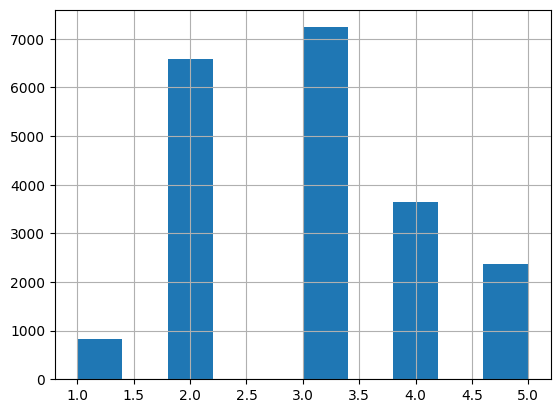

In [19]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
# La forma automatica de realizar la división
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [21]:
# Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset
df["income_cat"].value_counts() / len(df) # Se toma la columna income_cat del dtaframe original y se divide por la dimension del dataframe

strat_train_set["income_cat"].value_counts() / len(strat_train_set) # Se toma la columna income_cat del conjunto de datos de entrenamiento de dataframe de un muestreo estratificado y se divide por su dimensión

strat_test_set["income_cat"].value_counts() / len(strat_test_set) # Se toma la columna income_cat del conjunto de datos de test de dataframe de un muestreo estratificado y se divide por su dimensión


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7) # Se definen los datos de entrenamiento y los datos de test en otra columna que extrae los datos del dataframe orginal con condiciones especificas

train_set["income_cat"].value_counts() / len(train_set) # Se dividen los valoews de la columna income_cat del connjunto de datos de entrenamiento por su longitud

,count
income_cat,
3,0.348716
2,0.324188
4,0.173147
5,0.114159
1,0.039789


In [22]:
# Se agregan nuevas variables
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

PUNTO 13

In [23]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]

PUBTO 14

In [25]:
# Limpieza de datos

# Valores null del dataframe
df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna

# Media de la columna total_bedrooms
median = df["total_bedrooms"].median()
# Relleno de datos vacios en dataframe y copia de las nuevas columnas
q=df["total_bedrooms"].fillna(median).copy()

# Creación de dataframe q con datos rellenados
q=pd.DataFrame(q)
# Verificación de datos null en el dataframe
q.isnull().sum()
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

# Remoción de labels especificos en la columna ocean_proximity
df_train_num = df.drop("ocean_proximity", axis=1)
 # Manejo de datos perdidos en dataframe con la media
imp_mean = SimpleImputer( strategy='mean')

#Entrenamiento del modeLO
imp_mean.fit(df_train_num)

imp_mean.statistics_

# Comparación de variables
X = imp_mean.transform(df_train_num)

df_train_tr = pd.DataFrame(X, columns=df_train_num.columns,
                          index=df_train_num.index)

In [26]:
imp_mean.statistics_
numerical_cols = df_train_num.select_dtypes(include=['number']).columns
numerical_cols = df_train_num.select_dtypes(include=['number']).columns
#Constuye la matriz de características:

X = imp_mean.transform(df.drop(columns=['ocean_proximity']))
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)

PUNTO 15

In [27]:
from sklearn.preprocessing import OneHotEncoder

# Identificacipon de variables en la columna ocen_proximity
df["ocean_proximity"].unique()
# Definición de variable con la columna ocean_proximity
housing_cat=df[["ocean_proximity"]]
housing_cat

#Conversion de variables categoricas en un formato para el algoritmo
cat_encoder = OneHotEncoder(sparse_output=False)
# Codificación de los datos de aprendizaje para aprender de una unica categoria y transformacion de los datos en categorias de hot-format
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


PUNTO 16

In [28]:
cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

In [29]:
# dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

# Assuming you have strat_train_set and strat_test_set from the previous code

# Create housing_train with features and labels
housing_train = strat_train_set.copy()  # Create a copy to avoid modifying the original
housing_train_labels = housing_train["median_house_value"].copy()
housing_train = housing_train.drop("median_house_value", axis=1)  # Drop labels from features

# Create housing_test with features and labels
housing_test = strat_test_set.copy()
housing_test_labels = housing_test["median_house_value"].copy()
housing_test = housing_test.drop("median_house_value", axis=1)


AUTOMATIZACION DEL PROCESO CON CALCULO DEL MODELO

In [31]:

# Identify the columns to apply each transformation

categorical_features = ['ocean_proximity']

numeric_features= ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']

# Define the transformations for each column type
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Create a ColumnTransformer that applies the transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with the preprocessor
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

# Fit and transform the data
cleaned_data = pipeline.fit_transform(df)


# Get feature names for each transformer
cat_columns = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_columns = numeric_features + list(cat_columns)

# Convert the result back to a DataFrame for easier viewing
cleaned_df = pd.DataFrame(cleaned_data, columns=all_columns)

In [32]:
#Including a regression fit

# Identify the columns to apply each transformation
categorical_features = ['ocean_proximity']
numeric_features= ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
target = 'median_house_value'

# Split data into features and target
X = df.drop(columns=[target])
y = df[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the transformations for each column type
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Create a ColumnTransformer that applies the transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with preprocessing and regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate mean squared error for the regression model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4904409297.414935
